# **Import Library**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
missing_values = ['Unknown / Non-Applicable', 'n/a', 'nan', 'NaN', '-', '--', 'null', ' ', '-1', -1]
jams = pd.read_csv('/content/drive/MyDrive/Data Science/Data Consultant/Mini Project DS/aggregate_median_jams_Kota Bogor.csv',na_values = missing_values)

# **Data Preparation & Cleaning**

In [ ]:
jams.head(3)

,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,0,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Pahlawan,2,784.0,62.0,20.310001,4,33469021,2022-07-06,2.0,"MULTILINESTRING ((106.797269 -6.608899, 106.79..."
1,1,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Tol Lingkar Luar Bogor,2,1314.0,63.0,37.710000,2,33469023,2022-07-06,2.0,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
2,2,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,NaN,0.000000,61,33469019,2022-07-06,5.0,"MULTILINESTRING ((106.800516 -6.561997, 106.80..."


In [ ]:
jams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102322 entries, 0 to 102321
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 102322 non-null  int64  
 1   time                       102322 non-null  object 
 2   kemendagri_kabupaten_kode  102322 non-null  float64
 3   kemendagri_kabupaten_nama  102322 non-null  object 
 4   street                     100529 non-null  object 
 5   level                      102322 non-null  int64  
 6   median_length              102322 non-null  float64
 7   median_delay               100832 non-null  float64
 8   median_speed_kmh           102322 non-null  float64
 9   total_records              102322 non-null  int64  
 10  id                         102322 non-null  int64  
 11  date                       102322 non-null  object 
 12  median_level               102322 non-null  float64
 13  geometry                   10

**Rename Column Name**

In [ ]:
# rename column name
jams.rename(columns={
      'time' : 'record_time',
      'street': 'street_name',
      'level': 'jam_level',
      'median_length' : 'jam_length',
      'median_delay' : 'jam_lost_seconds',
      'median_speed_kmh' : 'speed_on_jam',
      'id' : 'record_id'}, inplace = True)

In [ ]:
jams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102322 entries, 0 to 102321
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 102322 non-null  int64  
 1   record_time                102322 non-null  object 
 2   kemendagri_kabupaten_kode  102322 non-null  float64
 3   kemendagri_kabupaten_nama  102322 non-null  object 
 4   street_name                100529 non-null  object 
 5   jam_level                  102322 non-null  int64  
 6   jam_length                 102322 non-null  float64
 7   jam_lost_seconds           100832 non-null  float64
 8   speed_on_jam               102322 non-null  float64
 9   total_records              102322 non-null  int64  
 10  record_id                  102322 non-null  int64  
 11  date                       102322 non-null  object 
 12  median_level               102322 non-null  float64
 13  geometry                   10

**Check & Handling Missing Values**

In [ ]:
# check missing value
data_missing_value = jams.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(jams))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,street_name,1793,1.752
1,jam_lost_seconds,1490,1.456


`street_name` and `jam_lost_hour` have missing value < 5%, we can handling it with delete the row that has missing value.

In [ ]:
#drop missing value
jams = jams.dropna()

In [ ]:
# recheck missing value
jams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99042 entries, 0 to 102321
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 99042 non-null  int64  
 1   record_time                99042 non-null  object 
 2   kemendagri_kabupaten_kode  99042 non-null  float64
 3   kemendagri_kabupaten_nama  99042 non-null  object 
 4   street_name                99042 non-null  object 
 5   jam_level                  99042 non-null  int64  
 6   jam_length                 99042 non-null  float64
 7   jam_lost_seconds           99042 non-null  float64
 8   speed_on_jam               99042 non-null  float64
 9   total_records              99042 non-null  int64  
 10  record_id                  99042 non-null  int64  
 11  date                       99042 non-null  object 
 12  median_level               99042 non-null  float64
 13  geometry                   99042 non-null  ob

**Check & Handling Duplicated Data**

In [ ]:
jams.duplicated().sum()

0

**Checking Unique Value**

In [ ]:
for col in jams.columns:
  print(f'Value counts of -- {col}-- column')
  print(jams[col].value_counts(), '\n')

Value counts of -- Unnamed: 0-- column
0        2
15208    2
15216    2
15215    2
15214    2
        ..
41544    1
41545    1
41546    1
41547    1
22950    1
Name: Unnamed: 0, Length: 77541, dtype: int64 

Value counts of -- record_time-- column
2022-07-16 14:00:00.000    227
2022-07-16 16:00:00.000    216
2022-07-16 13:00:00.000    214
2022-07-30 14:00:00.000    209
2022-08-13 14:00:00.000    207
                          ... 
2022-09-01 03:00:00.000      1
2022-09-03 04:00:00.000      1
2022-08-20 02:00:00.000      1
2022-07-13 03:00:00.000      1
2022-08-13 05:00:00.000      1
Name: record_time, Length: 1431, dtype: int64 

Value counts of -- kemendagri_kabupaten_kode-- column
32.71    99042
Name: kemendagri_kabupaten_kode, dtype: int64 

Value counts of -- kemendagri_kabupaten_nama-- column
KOTA BOGOR    99042
Name: kemendagri_kabupaten_nama, dtype: int64 

Value counts of -- street_name-- column
N9 Raden KH Abdullah bin Nuh    3658
N9 Jalan Raya Pajajaran         3621
N9 Jalan R

**Feature Engineering**

There are several features we need to transform, that are :
1. Column `unnamed` and `record_id` need to be removed because they have unique values that are equal to the number of rows.
2. Column `kemendagri_kabupaten_kode` and `kemendagri_kabupaten_nama` have just one unique value, so we can also removed them.
3. Value of column `median_level` same with value of `jam_level`, so we can remove `median_level` column.
4. We need to extract time from `record_time` column.
5. Change data type `time` into datetime.
6. Because we want to use clustering to define traffic jam severity level, we don't need feature `jam_level`

In [ ]:
#drop the column
jams = jams.drop(columns = ['Unnamed: 0', 'record_id', 'kemendagri_kabupaten_kode', 'kemendagri_kabupaten_nama', 'median_level', 'jam_level'], axis=1)

In [ ]:
#extract time
jams['record_time'] = pd.to_datetime(jams['record_time'])
jams['time'] = jams['record_time'].dt.hour
jams.drop(['record_time'], axis = 'columns', inplace = True)
jams.head(3)

,street_name,jam_length,jam_lost_seconds,speed_on_jam,total_records,date,geometry,time
0,Pahlawan,784.0,62.0,20.310001,4,2022-07-06,"MULTILINESTRING ((106.797269 -6.608899, 106.79...",0
1,Tol Lingkar Luar Bogor,1314.0,63.0,37.710000,2,2022-07-06,"LINESTRING (106.787027 -6.559782, 106.787701 -...",0
3,N8 Jalan Raya Sukabumi,379.0,117.5,8.594999,10,2022-07-06,"MULTILINESTRING ((106.845486 -6.6594, 106.8454...",0


In [ ]:
# change date type into datetime
jams['date'] = pd.to_datetime(jams['date'])

In [ ]:
jams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99042 entries, 0 to 102321
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   street_name       99042 non-null  object        
 1   jam_length        99042 non-null  float64       
 2   jam_lost_seconds  99042 non-null  float64       
 3   speed_on_jam      99042 non-null  float64       
 4   total_records     99042 non-null  int64         
 5   date              99042 non-null  datetime64[ns]
 6   geometry          99042 non-null  object        
 7   time              99042 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 6.8+ MB


# **Exploratory Data Analysis**

## **1. Statistical Summary**

In [ ]:
# group column names based on type
num = ['jam_length','jam_lost_seconds','speed_on_jam','total_records','time']
cat = ['street_name', 'geometry']

In [ ]:
jams[num].describe()

,jam_length,jam_lost_seconds,speed_on_jam,total_records,time
count,99042.000000,99042.000000,99042.000000,99042.000000,99042.000000
mean,859.196205,133.946720,14.412883,16.944993,13.869268
std,547.752272,109.727822,7.841735,19.940255,4.345299
min,29.000000,18.000000,0.510000,1.000000,0.000000
25%,464.000000,76.000000,8.310000,4.000000,11.000000
50%,747.000000,98.000000,13.340000,10.000000,14.000000
75%,1154.000000,146.500000,19.320000,22.000000,17.000000
max,8307.000000,2754.000000,63.614998,238.000000,23.000000


In [ ]:
for x in cat:
  print(f'Value counts of -- {x}-- column')
  print(jams[x].value_counts(), '\n')

Value counts of -- street_name-- column
N9 Raden KH Abdullah bin Nuh    3658
N9 Jalan Raya Pajajaran         3621
N9 Jalan Raya Dramaga           3174
N9 Jalan Raya Tajur             3054
N8 Jalan Raya Bogor             2954
                                ... 
Jagung                             1
Pembangunan 1                      1
Partibi                            1
Garuda 1                           1
Sedap Malam                        1
Name: street_name, Length: 453, dtype: int64 

Value counts of -- geometry-- column
LINESTRING (106.8119 -6.617865, 106.812194 -6.617675, 106.812419 -6.617579, 106.812637 -6.617515, 106.8128 -6.617497, 106.812882 -6.617499, 106.812987 -6.617501, 106.813237 -6.617534, 106.813506 -6.617604, 106.81379 -6.617742, 106.814011 -6.617863, 106.814134 -6.61793, 106.814991 -6.618426, 106.815456 -6.618616)                                                                                                                                                            

**Insight :**
1. The length of traffic jams that occur in the Bogor City ranges from 29 m - 8.307 km
2. The number of lost hours due to traffic jams that occurred in the Bogor City ranged from 18 seconds - 45.9 minutes
3. Vehicle speed when traffic jams occur in the Bogor City ranges from 0.51 km/h - 63.61 km/h 



## **2. Univariate Analysis**

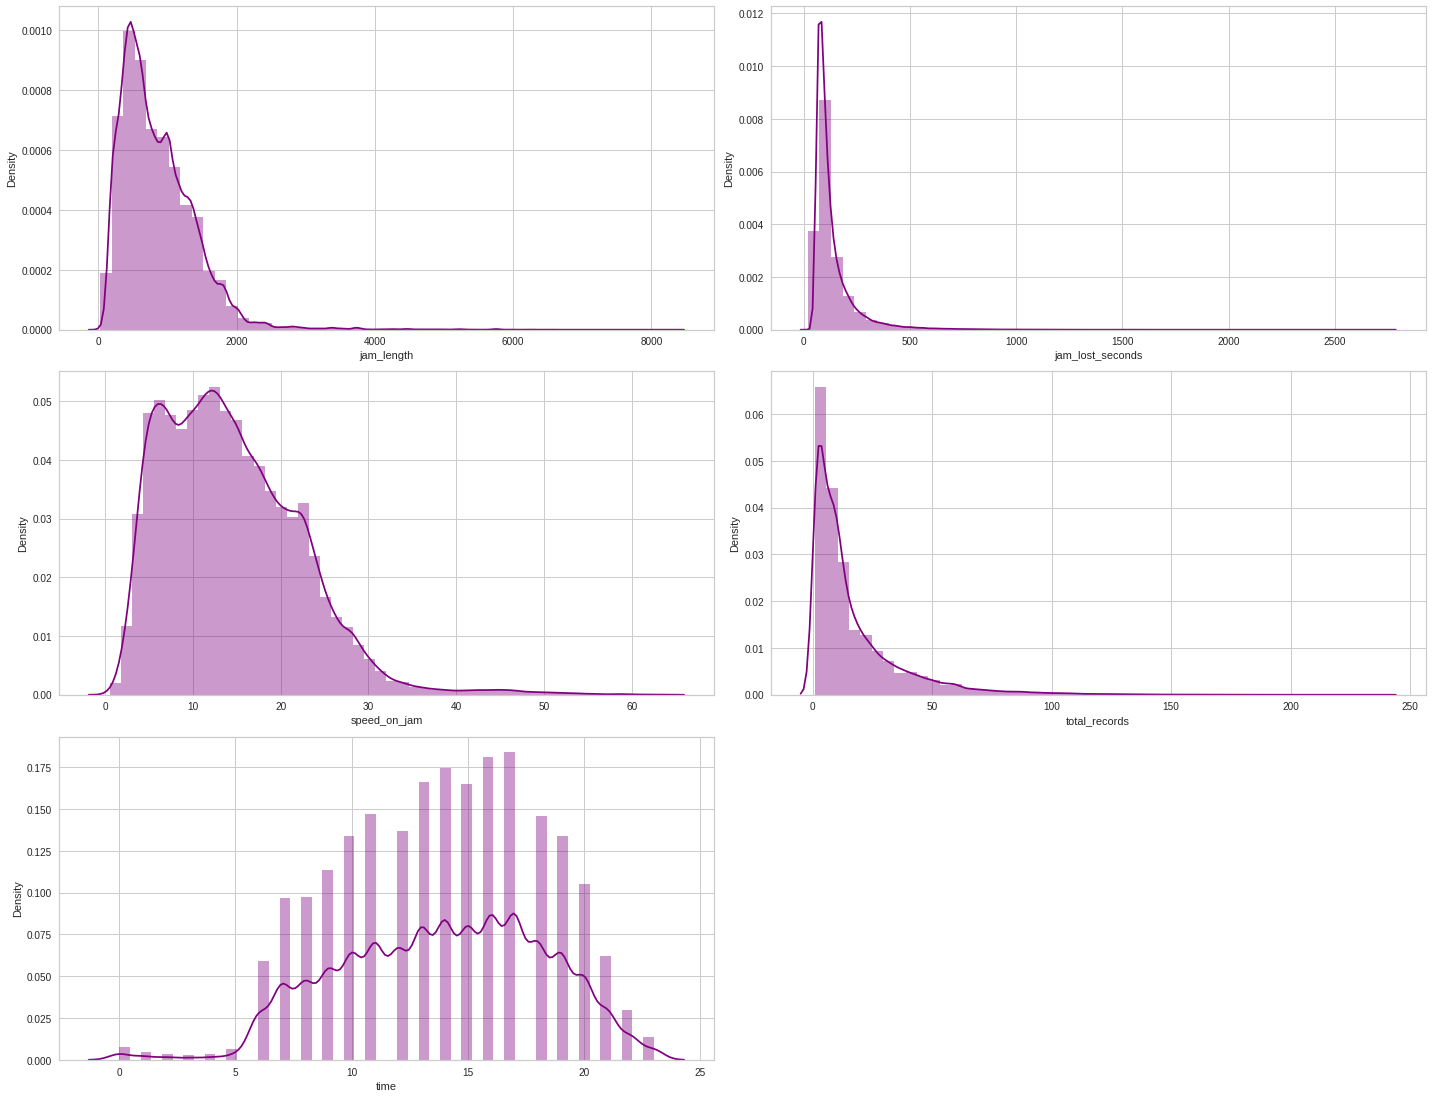

In [ ]:
#check distribution
plt.figure(figsize=(20,20))

features = num
for i in range(0, len(features)):
    plt.subplot(4, len(features)//4 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=jams[features[i]], color='purple')
    plt.xlabel(features[i])
    plt.tight_layout()

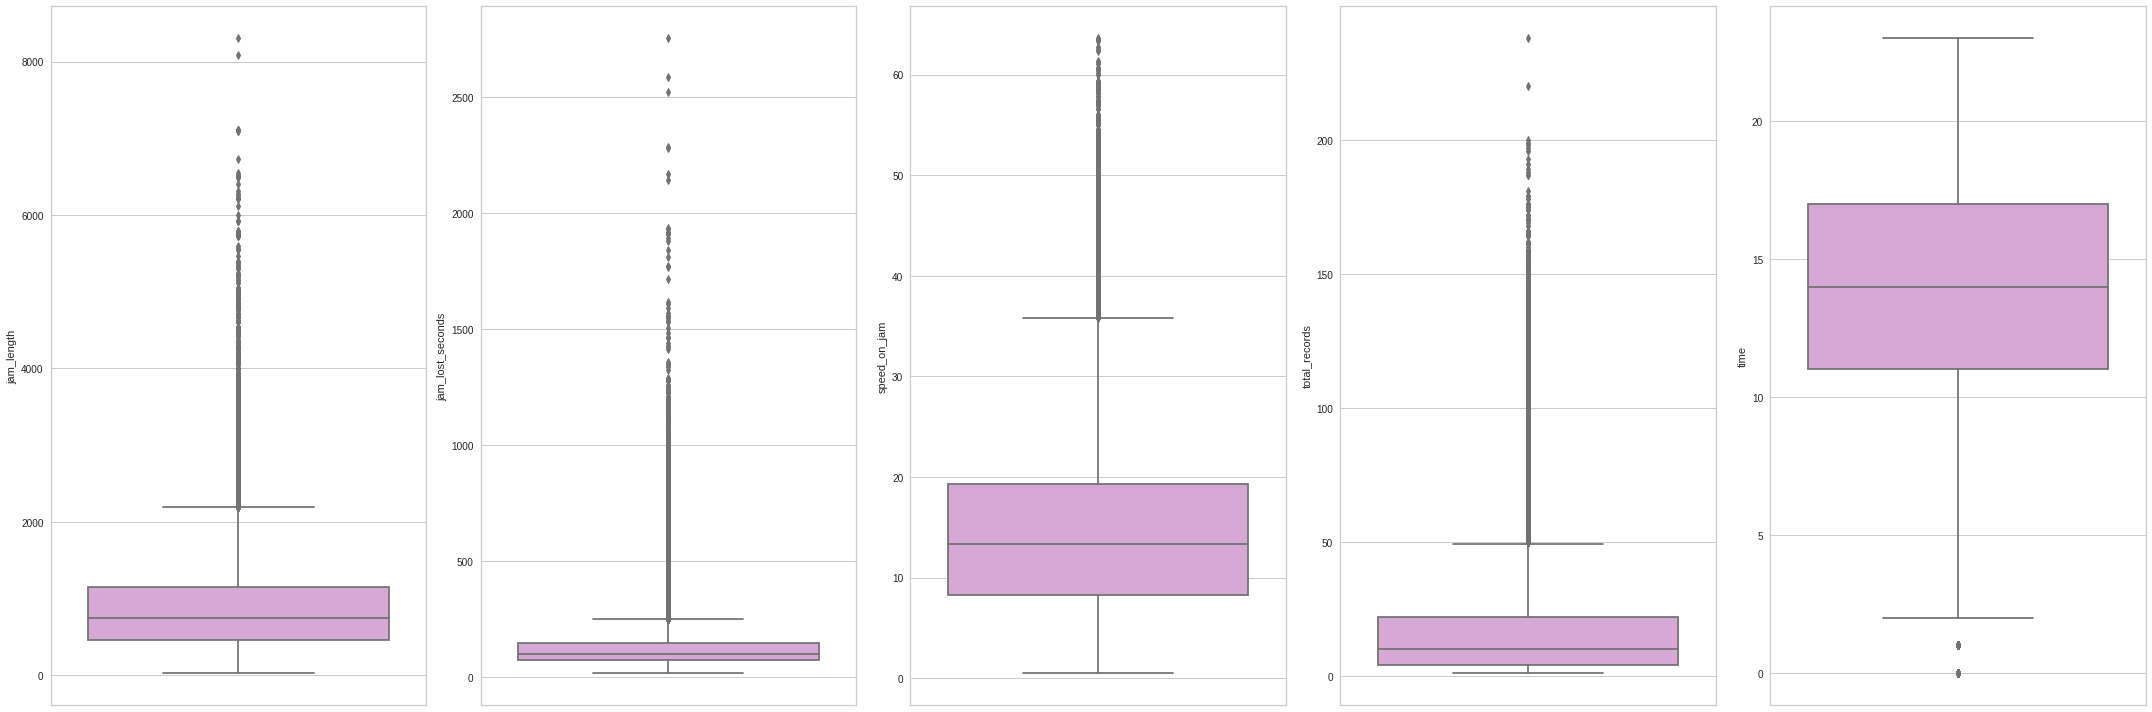

In [ ]:
# Checking outlier using BOXPLOT
plt.figure(figsize=(30,10))

# plotting
features = num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=jams[features[i]], color='plum')
    plt.tight_layout()

## **3. Multivariate Analysis**

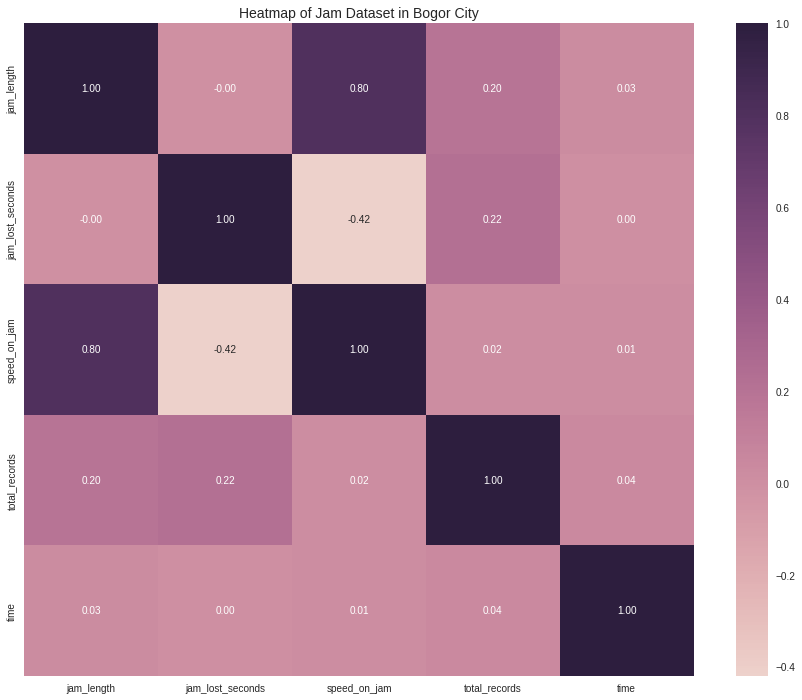

In [ ]:
correlation = jams[num].corr()
plt.figure(figsize=(15, 12))
colormap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap = colormap)
plt.title('Heatmap of Jam Dataset in Bogor City', fontsize=14)
plt.show()

**Insight :**

There is positive strong correlation between `speed_on_jam` and `jam_length` features

## **4. More Insight**

**At what time do traffic jams often occur in the city of Bogor?**

In [ ]:
jam_hour  = (jams
            .groupby('time')
            .agg(jam_count =('total_records','count'))
            .reset_index())

jam_hour

,time,jam_count
0,0,358
1,1,210
2,2,150
3,3,118
4,4,157
5,5,294
6,6,2685
7,7,4400
8,8,4446
9,9,5163


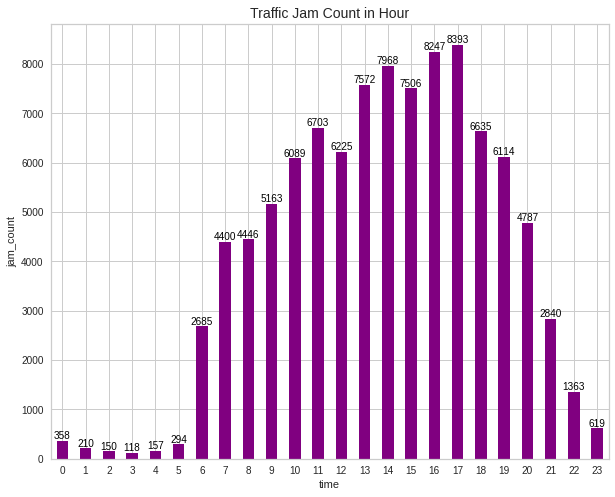

In [ ]:
ax = jams[['time','total_records']].groupby('time').count().plot(kind='bar', figsize=(10,8), legend = None, color = 'purple')
plt.xticks(rotation=0)
plt.ylabel('jam_count')
plt.title('Traffic Jam Count in Hour', fontsize=14)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)

**Insight :**

1. Traffic jam in Bogor City starts at 06.00 a.m until 11.00 a.m.
2. at 13.00 - 14.00, The number of traffic jam points continues to increase.
3. The peak of congestion occurs at 17.00 p.m. and decreased thereafter



# **Feature Selection**

There are 3 features that will be used to cluster the traffic jam severity in Bogor City, that are :
1. L = jam_length
2. H = jam_lost_seconds
3. S = speed_on_jam

In [ ]:
#select the features
data = jams[['jam_length','jam_lost_seconds','speed_on_jam']]

In [ ]:
# rename column name
data.rename(columns={
      'jam_length' : 'L',
      'jam_lost_seconds': 'H',
      'speed_on_jam': 'S'}, inplace = True)

In [ ]:
data.head()

,L,H,S
0,784.0,62.0,20.310001
1,1314.0,63.0,37.710000
3,379.0,117.5,8.594999
4,2438.0,87.0,42.270000
6,808.0,73.0,19.920000


# **Data Preprocessing**

**Outlier Handling**

In [ ]:
features = list(data) 

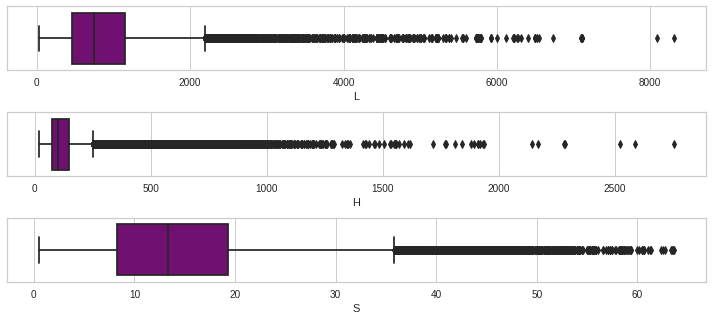

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(7, 1, i+1)
    sns.boxplot(data[features[i]],orient='h',color='purple')
    plt.tight_layout() 

In [ ]:
#log transformation
data['L'] = np.log1p(data['L'])
data['H'] = np.log1p(data['H'])
data['S'] = np.log1p(data['S'])

In [ ]:
#data after log transformation
data.head()

,L,H,S
0,6.665684,4.143135,3.059176
1,7.181592,4.158883,3.656098
3,5.940171,4.774913,2.261242
4,7.799343,4.477337,3.767460
6,6.695799,4.304065,3.040706


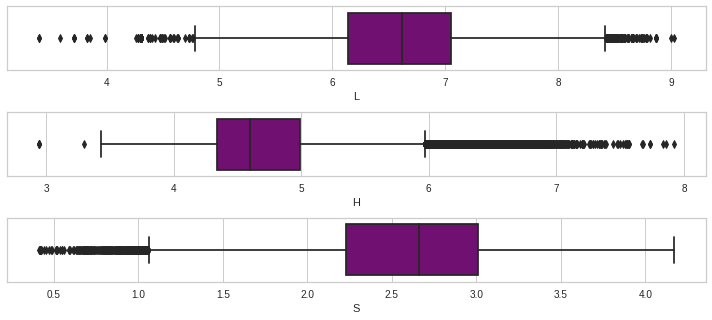

In [ ]:
#recheck outlier
plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(7, 1, i+1)
    sns.boxplot(data[features[i]],orient='h',color='purple')
    plt.tight_layout() 

# **Modelling**

## **1. K-Means**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.cluster import KMeans

inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data.values)
    nilai_inertia = kmeans.inertia_
    print('cluster: ', i, 'nilai inertia: ', nilai_inertia)
    inertia.append(kmeans.inertia_)

cluster:  2 nilai inertia:  49513.122103019865
cluster:  3 nilai inertia:  36051.97436974439
cluster:  4 nilai inertia:  26541.449785682937
cluster:  5 nilai inertia:  22101.933901823264
cluster:  6 nilai inertia:  18670.26086384386
cluster:  7 nilai inertia:  16468.024913364483
cluster:  8 nilai inertia:  14797.75344171334
cluster:  9 nilai inertia:  13409.400082316693
cluster:  10 nilai inertia:  12328.897302400208


<AxesSubplot:>

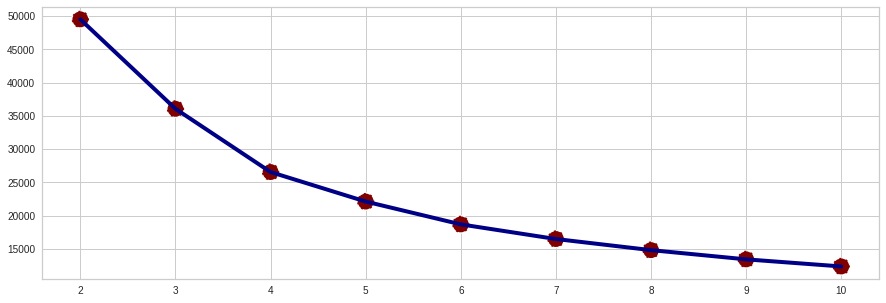

In [ ]:
# elbow method
arr_inertia = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=31).fit(data)
    arr_inertia.append(kmeans.inertia_) # Sum of squared distances of samples to their closest cluster center.
    
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x=range(2,11), y=arr_inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_inertia, s=300, color='#800000',  linestyle='--')

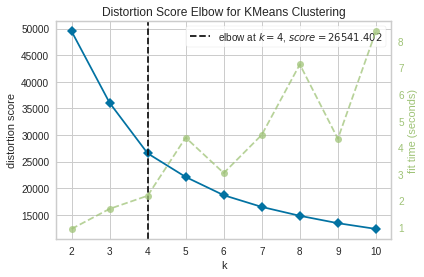

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(data[['L', 'H', 'S']])
elbow.show()

The angle that forms the elbow is at a value of k = 4

In [ ]:
#clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
data['cluster'] = kmeans.labels_
jams['cluster'] = kmeans.labels_

**Silhouette Score**

In [ ]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
from sklearn.metrics import silhouette_score

arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(data)
    prediction = kmeans.predict(data)
     
    score_euclidean = silhouette_score(data, prediction, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)
    print('cluster: ', i, 'nilai euclidean: ', score_euclidean)

cluster:  2 nilai euclidean:  0.5011344323956565
cluster:  3 nilai euclidean:  0.6146017328571717
cluster:  4 nilai euclidean:  0.6679646594531014
cluster:  5 nilai euclidean:  0.6182547627809094
cluster:  6 nilai euclidean:  0.5154076573358379
cluster:  7 nilai euclidean:  0.41432754867391963
cluster:  8 nilai euclidean:  0.35991324647419504
cluster:  9 nilai euclidean:  0.35650443007981286
cluster:  10 nilai euclidean:  0.3688441230153972


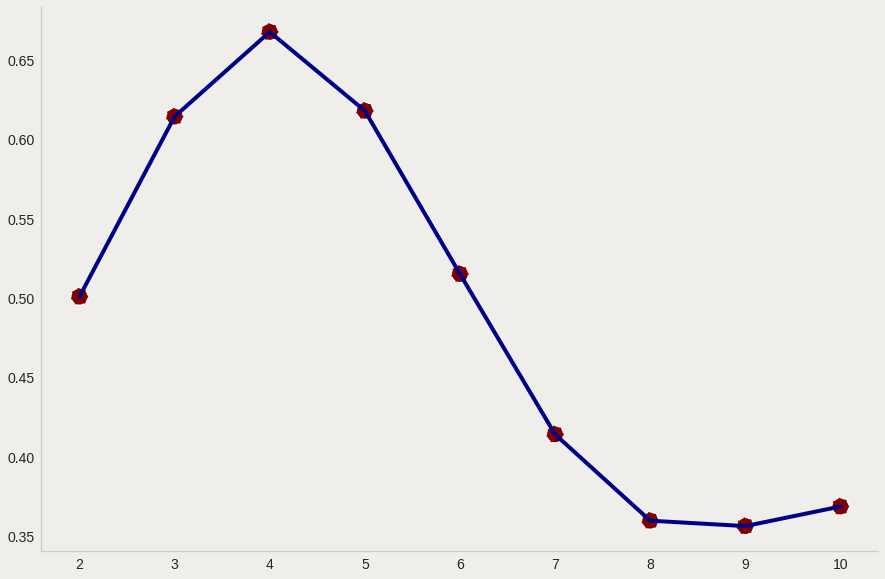

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10), facecolor='#f0eeeb')
ax = sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
ax = sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
ax.grid(False)
ax.set_facecolor('#f0eeeb')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='both', labelsize=14)

**Plot**

In [ ]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['cluster']==n]['L'],
        y = db[db['cluster']==n]['H'],
        z = db[db['cluster']==n]['S'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(data, 0, 'Cluster 0')
trace1 = tracer(data, 1, 'Cluster 1')
trace2 = tracer(data, 2, 'Cluster 2')
trace3 = tracer(data, 3, 'Cluster 3')

data_trace = [trace0, trace1, trace2, trace3]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'L'),
            yaxis = dict(title = 'H'),
            zaxis = dict(title = 'S')
        )
)

fig = go.Figure(data=data_trace, layout=layout)
py.offline.iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

## **2. DBSCAN**

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=6).fit(data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 29


In [ ]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(data, labels):.3f}")

Silhouette Coefficient: 0.668


From the result we know that DBSCAN can't divide the cluster more than 1 and silhoutte score is less than the K-Means Method

# **Model Analysis**

In [ ]:
# Re-transform numpy log
data['L'] = np.expm1(data['L'])
data['H'] = np.expm1(data['H'])
data['S'] = np.expm1(data['S'])

In [ ]:
data.head()

,L,H,S,cluster
0,784.0,62.0,20.310001,2
1,1314.0,63.0,37.710000,2
3,379.0,117.5,8.594999,3
4,2438.0,87.0,42.270000,2
6,808.0,73.0,19.920000,2


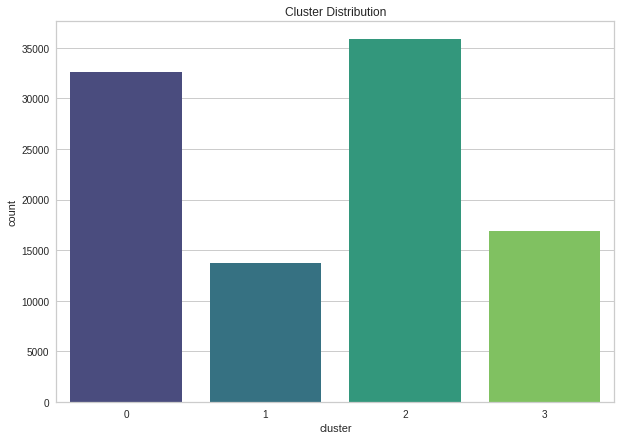

In [ ]:
plt.figure(figsize=(10,7))
pl = sns.countplot(x = data['cluster'], palette='viridis')
pl.set_title('Cluster Distribution')
plt.show()

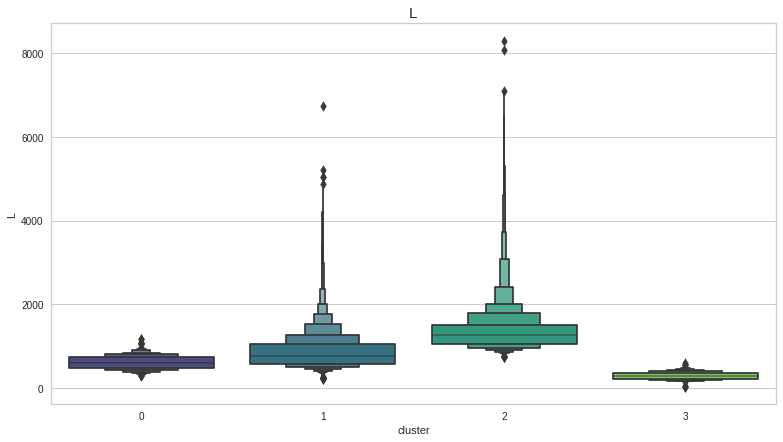

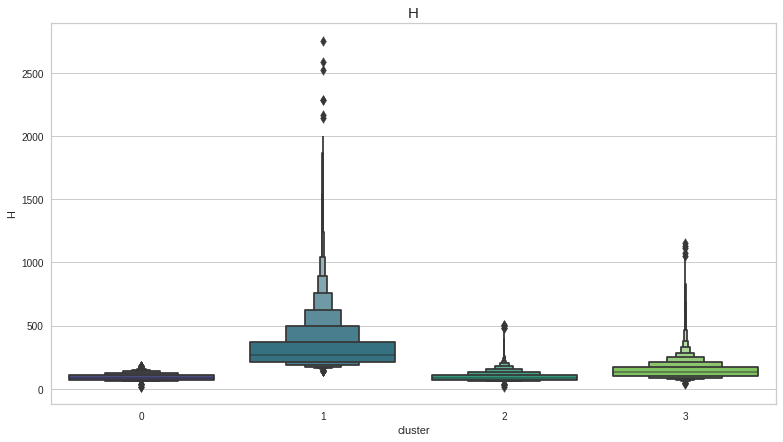

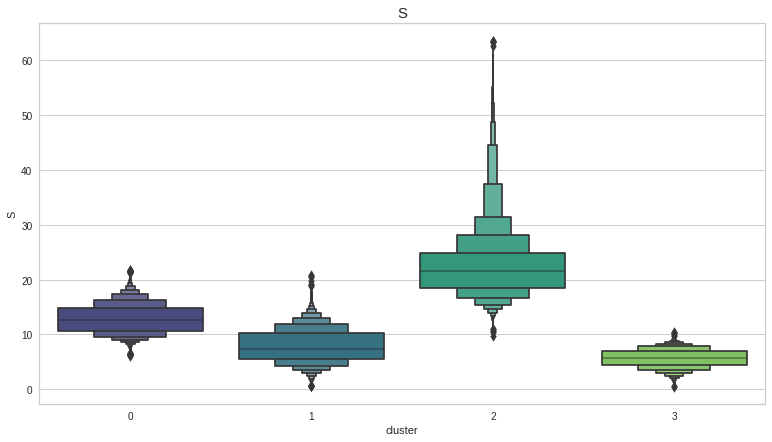

In [ ]:
for i in data.columns[0:3]:
  plt.figure(figsize=(13,7))
  pl = sns.boxenplot(x = data['cluster'], y = data[i], palette='viridis')
  pl.set_title(i, fontsize=15)
plt.show()

In [ ]:
median_cluster = data.groupby('cluster')['L','H','S'].agg(['median']).reset_index()
median_cluster

,cluster,L,H,S
,,median,median,median
0,0,591.0,85.00,12.620
1,1,747.0,265.75,7.370
2,2,1263.0,84.50,21.500
3,3,279.0,129.00,5.685


1. Characteristics of Cluster 0
   - The value of `length of jam` ranks 3rd out of all clusters. The jam length is small compared to clusters 1 and 2.
   - The value of `jam lost seconds` is the lowest and almost the same as cluster 2. The amount of time wasted due to traffic jams is small
   - The value of `speed of jam` ranks 2nd out of all clusters. Vehicle speed is quite high compared to clusters 1 and 3.

2. Characteristics of Cluster 1
   - The value of `length of jam` ranks 2nd out of all clusters. Moderate jam length compared to cluster 2.
   - The highest value for `jam lost seconds` means that the amount of time wasted due to traffic jams is high.
   - The value of `speed of jam` ranks 3rd out of all clusters. Vehicle speed is lower than clusters 0 and 2.

3. Characteristics of Cluster 2
   - Highest `length of jam` value of all clusters. High jam length.
   - The value of `jam lost seconds` ranks 3rd, meaning that the amount of time wasted due to traffic jams is low.
   - The highest `speed of jam` value of all clusters. Vehicle speed is higher than all clusters.

4. Characteristics of Cluster 3
   - The lowest `length of jam` value of all clusters. Minimum jam length.
   - The value of `jam lost seconds` ranks 2nd, meaning the amount of time wasted due to medium traffic jams.
   - The lowest `speed of jam` value of all clusters. The lowest vehicle speed of all clusters.

From the characteristic above, we can label all cluster based on jam severity to be like this :
1. Critical = Cluster 1
2. High = Cluster 3
3. Medium = Cluster 2
4. Low = Cluster 0

## **1. Critical Traffic Jam**

In [ ]:
critical = jams.loc[(jams['cluster'] == 1)]
critical.head(3)

,street_name,jam_length,jam_lost_seconds,speed_on_jam,total_records,date,geometry,time,cluster
34,Kapten Muslihat,637.0,272.0,6.25,4,2022-07-06,"MULTILINESTRING ((106.788508 -6.595381, 106.78...",7,1
53,Pulo Empang,482.0,221.0,5.86,11,2022-07-06,"MULTILINESTRING ((106.792102 -6.606277, 106.79...",7,1
107,Letjen Ibrahim Adjie,508.0,169.0,8.52,8,2022-07-06,"MULTILINESTRING ((106.771077 -6.584933, 106.77...",8,1


In [ ]:
critical.describe()

,jam_length,jam_lost_seconds,speed_on_jam,total_records,time,cluster
count,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.0
mean,855.772161,322.648017,7.846033,27.474996,13.764689,1.0
std,417.859668,181.251406,3.142337,27.077815,3.964341,0.0
min,197.000000,137.000000,0.520000,1.000000,0.000000,1.0
25%,564.000000,208.000000,5.442500,8.000000,11.000000,1.0
50%,747.000000,265.750000,7.370000,19.000000,14.000000,1.0
75%,1037.000000,373.000000,10.190000,39.000000,17.000000,1.0
max,6732.000000,2754.000000,20.939999,238.000000,23.000000,1.0


**Critical Traffic Jam's Point and Time**

In [ ]:
critical_point = critical.filter(["street_name", "time"]).sort_values('time', ascending = True)
critical_point

,street_name,time
79368,N9 Ir Haji Juanda,0
32534,Tol Jagorawi,0
63499,Kolonel Ahmad Syam,0
63501,Jalan R3 Katulampa,0
63502,Jalan R3 Katulampa,0
...,...,...
97986,Kapten Yusuf,23
87917,Semplak Raya,23
65712,N9 Jalan Raya Dramaga,23
11752,Cilebut Raya,23


In [ ]:
critical_point = critical_point.drop_duplicates(keep='last')

In [ ]:
critical_point['time'] = critical_point['time'].map(str)

In [ ]:
critical_point['time'] = critical_point[['street_name','time']].groupby(['street_name'])['time'].transform(lambda x: ','.join(x))

In [ ]:
critical_point = critical_point.drop_duplicates(keep='last')


In [ ]:
critical_point.reset_index(inplace = True, drop = True)

In [ ]:
critical_point

,street_name,time
0,Kantor Batu,7
1,Bantar Kemang,7
2,Raden Kan'an,"7,8"
3,Perintis Kemerdekaan,8
4,Babakan Raya,9
...,...,...
174,Kapten Yusuf,"0,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,..."
175,Semplak Raya,"0,1,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20..."
176,N9 Jalan Raya Dramaga,"6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23"
177,Cilebut Raya,"6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23"


**10 points that have the highest jam_length (critical)**

In [ ]:
highest_jam_length = critical.filter(["street_name", "jam_length"])

In [ ]:
highest_jam_length = (highest_jam_length
                      .groupby('street_name')
                      .agg(avg_jam_length=('jam_length','mean'))
                      .reset_index())

highest_jam_length = highest_jam_length.sort_values('avg_jam_length', ascending = False)

highest_jam_length.reset_index(inplace = True, drop = True)

highest_jam_length.head(10)

,street_name,avg_jam_length
0,Tol Bocimi,3329.000000
1,Tol Lingkar Luar Bogor,1622.550000
2,N9 Jalan Raya Tajur,1540.675234
3,N9 Ir Haji Juanda,1430.656250
4,Tol Jagorawi,1423.818182
5,N9 Jalan Raya Pajajaran,1259.674941
6,Arah Sentul Selatan/Tol Lingkar Bogor/Jakarta,1241.000000
7,Brigjen Saptadji Hadi Prawira,1200.964183
8,Babakan Dramaga,1130.687500
9,N9 Jalan Raya Ciawi,1118.718204


**10 points that have the highest jam_lost_seconds (critical)**

In [ ]:
highest_jam_lost_seconds = critical.filter(["street_name", "jam_lost_seconds"])

In [ ]:
highest_jam_lost_seconds = (highest_jam_lost_seconds
                           .groupby('street_name')
                           .agg(avg_jam_lost_seconds=('jam_lost_seconds','mean'))
                           .reset_index())

highest_jam_lost_seconds = highest_jam_lost_seconds.sort_values('avg_jam_lost_seconds', ascending = False)

highest_jam_lost_seconds.reset_index(inplace = True, drop = True)

highest_jam_lost_seconds.head(10)

,street_name,avg_jam_lost_seconds
0,Cilendek Timur,1426.000000
1,Tol Bocimi,1110.000000
2,Bina Marga 2,971.000000
3,Rumah Sakit 1,967.000000
4,Jalan Pabuaran,857.000000
5,AH Nasution,828.700000
6,Sancang,756.666667
7,Jalan Lingkar Dramaga,545.650000
8,Jalan Cimahpar,544.833333
9,RH Muh Tohir,521.000000


**10 points that have the highest speed_on_jam (critical)**

In [ ]:
highest_speed = critical.filter(["street_name", "speed_on_jam"])

In [ ]:
highest_speed = (highest_speed
                .groupby('street_name')
                .agg(avg_speed =('speed_on_jam','mean'))
                .reset_index())

highest_speed = highest_speed.sort_values('avg_speed', ascending = False)

highest_speed.reset_index(inplace = True, drop = True)

highest_speed.head(10)

,street_name,avg_speed
0,Jalan Kampung Mulyasari,14.110001
1,Bojongkerta Rancamaya,12.367727
2,Tol Lingkar Luar Bogor,12.009357
3,N9 Ir Haji Juanda,11.838036
4,Arah Sentul Selatan/Tol Lingkar Bogor/Jakarta,11.823333
5,Batara,11.435556
6,Jalan Sukabumi-Rancamaya,11.099000
7,Jalan Kampung Buntar,10.982391
8,Tol Jagorawi,10.976545
9,N6 Jalan Raya Kemang-Bogor,10.793750


## **2. High Traffic Jam**

In [ ]:
high = jams.loc[(jams['cluster'] == 3)]
high.head(3)

,street_name,jam_length,jam_lost_seconds,speed_on_jam,total_records,date,geometry,time,cluster
3,N8 Jalan Raya Sukabumi,379.0,117.5,8.594999,10,2022-07-06,"MULTILINESTRING ((106.845486 -6.6594, 106.8454...",0,3
18,Mawar,241.0,106.0,6.010000,9,2022-07-06,"MULTILINESTRING ((106.785881 -6.590041, 106.78...",5,3
24,N9 Raden KH Abdullah bin Nuh,219.0,73.0,6.150000,7,2022-07-06,"MULTILINESTRING ((106.759261 -6.568198, 106.75...",6,3


In [ ]:
high.describe()

,jam_length,jam_lost_seconds,speed_on_jam,total_records,time,cluster
count,16875.000000,16875.000000,16875.000000,16875.000000,16875.000000,16875.0
mean,286.148000,144.509896,5.684620,10.555674,13.898193,3.0
std,86.616889,66.407122,1.731494,10.932087,4.193319,0.0
min,29.000000,38.000000,0.510000,1.000000,0.000000,3.0
25%,214.000000,102.000000,4.427500,3.000000,11.000000,3.0
50%,279.000000,129.000000,5.685000,8.000000,14.000000,3.0
75%,355.000000,170.000000,7.050000,13.000000,17.000000,3.0
max,584.000000,1152.000000,10.490000,109.000000,23.000000,3.0


**High Traffic Jam's Point and Time**

In [ ]:
high_point = high.filter(["street_name", "time"]).sort_values('time', ascending = True)
high_point

,street_name,time
3,N8 Jalan Raya Sukabumi,0
51488,Pajajaran Indah 5,0
53803,N6 Jalan Raya Kemang-Bogor,0
57196,N9 Jalan Raya Dramaga,0
57197,N9 Ir Haji Juanda,0
...,...,...
25425,Brigjen Saptadji Hadi Prawira,23
23961,N9 Ir Haji Juanda,23
19440,Jalan Empang,23
19432,N9 Jalan Raya Dramaga,23


In [ ]:
high_point = high_point.drop_duplicates(keep='last')

In [ ]:
high_point['time'] = high_point['time'].map(str)

In [ ]:
high_point['time'] = high_point[['street_name','time']].groupby(['street_name'])['time'].transform(lambda x: ','.join(x))

In [ ]:
high_point = high_point.drop_duplicates(keep='last')

In [ ]:
high_point.reset_index(inplace = True, drop = True)

In [ ]:
high_point

,street_name,time
0,Mawar 3,2
1,Arah Ciawi/Jakarta (Lewat Jalan Tol),"1,2"
2,Arah Tol Bogor Lingkar Luar,6
3,Poras,6
4,Cluster Oakwood,6
...,...,...
398,Brigjen Saptadji Hadi Prawira,"6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23"
399,N9 Ir Haji Juanda,"0,1,3,5,7,9,23"
400,Jalan Empang,"5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,..."
401,N9 Jalan Raya Dramaga,"0,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23"


**10 points that have the highest jam_length (high)**

In [ ]:
highest_jam_length = high.filter(["street_name", "jam_length"])

In [ ]:
highest_jam_length = (highest_jam_length
                      .groupby('street_name')
                      .agg(avg_jam_length=('jam_length','mean'))
                      .reset_index())

highest_jam_length = highest_jam_length.sort_values('avg_jam_length', ascending = False)

highest_jam_length.reset_index(inplace = True, drop = True)

highest_jam_length.head(10)

,street_name,avg_jam_length
0,Bakom,540.000000
1,Babadak,522.000000
2,Menteng,492.000000
3,Warung Nangka,475.000000
4,Garuda Raya,455.000000
5,Cluster Oakwood,417.000000
6,Artzimar 2,413.000000
7,Exit 40: Bogor/Kebun Raya,411.000000
8,Cilubang,405.666667
9,Mekar Jaya,397.333333


**10 points that have the highest jam_lost_seconds (high)**

In [ ]:
highest_jam_lost_seconds = high.filter(["street_name", "jam_lost_seconds"])

In [ ]:
highest_jam_lost_seconds = (highest_jam_lost_seconds
                           .groupby('street_name')
                           .agg(avg_jam_lost_seconds=('jam_lost_seconds','mean'))
                           .reset_index())

highest_jam_lost_seconds = highest_jam_lost_seconds.sort_values('avg_jam_lost_seconds', ascending = False)

highest_jam_lost_seconds.reset_index(inplace = True, drop = True)

highest_jam_lost_seconds.head(10)

,street_name,avg_jam_lost_seconds
0,Perum Sindang Barang,766.50
1,Waliwis,669.00
2,Cimanggu Lamping,433.00
3,Arah Tol Lkr Luar Bogor/Tol Jagorawi (Lewat Ja...,302.00
4,Mawar 3,251.00
5,Babakan Dramaga,250.25
6,Astrid Avenue,248.50
7,An Nashr,235.50
8,Jalan Sambu,226.00
9,N9 Letjen Ibrahim Adjie,224.00


**10 points that have the highest speed_on_jam (high)**

In [ ]:
highest_speed = high.filter(["street_name", "speed_on_jam"])

In [ ]:
highest_speed = (highest_speed
                .groupby('street_name')
                .agg(avg_speed =('speed_on_jam','mean'))
                .reset_index())

highest_speed = highest_speed.sort_values('avg_speed', ascending = False)

highest_speed.reset_index(inplace = True, drop = True)

highest_speed.head(10)

,street_name,avg_speed
0,Anggrek 12,9.060000
1,Cluster Oakwood,9.050000
2,Duta Pelangi,8.920000
3,Balitro,8.645000
4,Penggalang,8.637500
5,Gang Masjid Al-Abrar,8.415000
6,Terapi 2,8.290000
7,Fajar Baru,8.275000
8,Rimba Mulya 2,8.200000
9,Vila Mutiara Bogor,8.183333


## **3. Medium Traffic Jam**

In [ ]:
medium = jams.loc[(jams['cluster'] == 2)]
medium.head(3)

,street_name,jam_length,jam_lost_seconds,speed_on_jam,total_records,date,geometry,time,cluster
0,Pahlawan,784.0,62.0,20.310001,4,2022-07-06,"MULTILINESTRING ((106.797269 -6.608899, 106.79...",0,2
1,Tol Lingkar Luar Bogor,1314.0,63.0,37.710000,2,2022-07-06,"LINESTRING (106.787027 -6.559782, 106.787701 -...",0,2
4,Tol Lingkar Luar Bogor,2438.0,87.0,42.270000,2,2022-07-06,"LINESTRING (106.787027 -6.559782, 106.787701 -...",0,2


In [ ]:
medium.describe()

,jam_length,jam_lost_seconds,speed_on_jam,total_records,time,cluster
count,35837.000000,35837.000000,35837.000000,35837.000000,35837.000000,35837.0
mean,1364.160170,95.126587,22.480873,19.239110,13.994642,2.0
std,517.484122,34.843432,6.186029,21.881606,4.581227,0.0
min,740.000000,18.000000,9.760000,1.000000,0.000000,2.0
25%,1037.000000,71.000000,18.490000,5.000000,10.000000,2.0
50%,1263.000000,84.500000,21.500000,11.000000,14.000000,2.0
75%,1511.000000,107.500000,24.790000,26.000000,18.000000,2.0
max,8307.000000,505.000000,63.614998,200.000000,23.000000,2.0


**Medium Traffic Jam's Point and Time**

In [ ]:
medium_point = medium.filter(["street_name", "time"]).sort_values('time', ascending = True)
medium_point

,street_name,time
0,Pahlawan,0
35598,N9 Jalan Raya Pajajaran,0
34061,N9 Jalan Raya Dramaga,0
34060,N6 Jalan Raya Baru,0
34058,N6 Jalan Raya Baru,0
...,...,...
85493,N6 Jalan Raya Baru,23
85494,N8 Jalan Raya Bogor,23
85496,N8 Jalan Raya Sukabumi,23
100418,N6 Jalan Raya Baru,23


In [ ]:
medium_point = medium_point.drop_duplicates(keep='last')

In [ ]:
medium_point['time'] = medium_point['time'].map(str)

In [ ]:
medium_point['time'] = medium_point[['street_name','time']].groupby(['street_name'])['time'].transform(lambda x: ','.join(x))

In [ ]:
medium_point = medium_point.drop_duplicates(keep='last')

In [ ]:
medium_point.reset_index(inplace = True, drop = True)

In [ ]:
medium_point

,street_name,time
0,Orchard Walk,9
1,Rancamaya Utama,"0,12"
2,Tajur Halang,"13,14"
3,Pajajaran Indah 5,"9,14"
4,Cibeureum Raya,"7,12,13,16,17"
...,...,...
82,Mayjen Ishak Djuarsa,"0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,2..."
83,N8 Jalan Raya Bogor,"0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1..."
84,N8 Jalan Raya Sukabumi,"0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18..."
85,N6 Jalan Raya Baru,"0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18..."


**10 points that have the highest jam_length (medium)**

In [ ]:
highest_jam_length = medium.filter(["street_name", "jam_length"])

In [ ]:
highest_jam_length = (highest_jam_length
                      .groupby('street_name')
                      .agg(avg_jam_length=('jam_length','mean'))
                      .reset_index())

highest_jam_length = highest_jam_length.sort_values('avg_jam_length', ascending = False)

highest_jam_length.reset_index(inplace = True, drop = True)

highest_jam_length.head(10)

,street_name,avg_jam_length
0,Tol Bocimi,4650.824176
1,Tol Jagorawi,2368.853012
2,Tol Lingkar Luar Bogor,2255.577113
3,N9 Jalan Raya Tajur,1879.515086
4,N6 Jalan Raya Baru,1778.576801
5,Arah Puncak/Ciawi/Sukabumi,1555.500000
6,N9 Ir Haji Juanda,1552.045146
7,N6 Jalan Raya Kemang-Bogor,1479.207031
8,N9 Jalan Raya Pajajaran,1461.019294
9,Kedunghalang Raya,1405.144038


**10 points that have the highest jam_lost_seconds (medium)**

In [ ]:
highest_jam_lost_seconds = medium.filter(["street_name", "jam_lost_seconds"])

In [ ]:
highest_jam_lost_seconds = (highest_jam_lost_seconds
                           .groupby('street_name')
                           .agg(avg_jam_lost_seconds=('jam_lost_seconds','mean'))
                           .reset_index())

highest_jam_lost_seconds = highest_jam_lost_seconds.sort_values('avg_jam_lost_seconds', ascending = False)

highest_jam_lost_seconds.reset_index(inplace = True, drop = True)

highest_jam_lost_seconds.head(10)

,street_name,avg_jam_lost_seconds
0,Jalan Kampung Mulyasari,154.750000
1,Bakom,150.250000
2,Sumurwangi,146.472222
3,Ciremai Ujung,142.500000
4,Tol Bocimi,140.087912
5,Dekeng Lama,137.000000
6,Orchard Walk,126.000000
7,Jalan Kampung Buntar,124.026316
8,N9 Jalan Raya Tajur,121.186063
9,Rancamaya Utama,119.500000


**10 points that have the highest speed_on_jam (medium)**

In [ ]:
highest_speed = medium.filter(["street_name", "speed_on_jam"])

In [ ]:
highest_speed = (highest_speed
                .groupby('street_name')
                .agg(avg_speed =('speed_on_jam','mean'))
                .reset_index())

highest_speed = highest_speed.sort_values('avg_speed', ascending = False)

highest_speed.reset_index(inplace = True, drop = True)

highest_speed.head(10)

,street_name,avg_speed
0,Tol Bocimi,51.533462
1,Tol Lingkar Luar Bogor,38.249215
2,Tol Jagorawi,37.115217
3,Arah Puncak/Ciawi/Sukabumi,32.608749
4,Exit 40: Bogor/Kebun Raya,30.860833
5,N6 Jalan Raya Baru,29.449703
6,N9 KH Soleh Iskandar,26.676819
7,N9 Ir Haji Juanda,24.946490
8,N9 Jalan Raya Tajur,24.705750
9,N6 Jalan Raya Kemang-Bogor,24.308242


## **3. Low Traffic Jam**

In [ ]:
low = jams.loc[(jams['cluster'] == 0)]
low.head(3)

,street_name,jam_length,jam_lost_seconds,speed_on_jam,total_records,date,geometry,time,cluster
17,Merdeka,713.0,108.5,12.105,8,2022-07-06,"MULTILINESTRING ((106.787776 -6.589451, 106.78...",5,0
20,Surya Kencana,643.0,74.0,14.130,2,2022-07-06,"LINESTRING (106.799196 -6.603818, 106.799296 -...",5,0
21,N8 Jalan Raya Bogor,900.0,147.0,12.230,5,2022-07-06,"MULTILINESTRING ((106.823053 -6.548055, 106.82...",6,0


In [ ]:
low.describe()

,jam_length,jam_lost_seconds,speed_on_jam,total_records,time,cluster
count,32612.000000,32612.000000,32612.000000,32612.000000,32612.000000,32612.0
mean,602.259061,91.764059,12.825767,13.300779,13.760518,0.0
std,153.133424,25.694290,2.718048,14.977952,4.305574,0.0
min,288.000000,18.000000,6.120000,1.000000,0.000000,0.0
25%,479.000000,71.000000,10.670000,3.000000,11.000000,0.0
50%,591.000000,85.000000,12.620000,9.000000,14.000000,0.0
75%,724.000000,107.000000,14.746251,17.000000,17.000000,0.0
max,1162.000000,182.500000,21.840000,160.000000,23.000000,0.0


**Low Traffic Jam's Point and Time**

In [399]:
low_point = low.filter(["street_name", "time"]).sort_values('time', ascending = True)
low_point

,street_name,time
102316,N9 KS Tubun,0
80817,Tol Jagorawi,0
53800,Bogor Nirwana Residence,0
51495,KH Soleh Iskandar (Jalur Lambat),0
51494,N9 Jalan Raya Pajajaran,0
...,...,...
77898,N9 Jalan Raya Dramaga,23
77902,N6 Jalan Raya Kemang-Bogor,23
77903,N9 Jalan Raya Dramaga,23
63488,Pangeran Asogiri,23


In [400]:
low_point = low_point.drop_duplicates(keep='last')

In [401]:
low_point['time'] = low_point['time'].map(str)

In [402]:
low_point['time'] = low_point[['street_name','time']].groupby(['street_name'])['time'].transform(lambda x: ','.join(x))

In [403]:
low_point = low_point.drop_duplicates(keep='last')

In [404]:
low_point.reset_index(inplace = True, drop = True)

In [405]:
low_point

,street_name,time
0,Nuansa Alam Cilebut Asri,2
1,Arah Ciawi/Jakarta (Lewat Jalan Tol),3
2,Arah Sentul Selatan/Tol Lingkar Bogor/Jakarta,"1,6"
3,Bukit Kayu Manis Raya,7
4,Poras,"6,7"
...,...,...
250,TB M Falak,"6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23"
251,N6 Jalan Raya Kemang-Bogor,"1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,2..."
252,N9 Jalan Raya Dramaga,"0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,..."
253,Pangeran Asogiri,"0,1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20..."


**10 points that have the highest jam_length (low)**

In [406]:
highest_jam_length = low.filter(["street_name", "jam_length"])

In [407]:
highest_jam_length = (highest_jam_length
                      .groupby('street_name')
                      .agg(avg_jam_length=('jam_length','mean'))
                      .reset_index())

highest_jam_length = highest_jam_length.sort_values('avg_jam_length', ascending = False)

highest_jam_length.reset_index(inplace = True, drop = True)

highest_jam_length.head(10)

,street_name,avg_jam_length
0,Ciremai Ujung,950.000000
1,Babakan Dramaga,905.666667
2,Pajajaran,857.000000
3,Cijeruk Raya,839.000000
4,Situpete,792.000000
5,Gang Ace,790.000000
6,Warung Nangka,789.083333
7,Arah Bogor/Cibinong/Jakarta,783.000000
8,Jalan Kampung Buntar,782.000000
9,Arah Simpang Yasmin/Kedung Halang/Sentul lewat...,776.000000


**10 points that have the highest jam_lost_seconds (low)**

In [408]:
highest_jam_lost_seconds = low.filter(["street_name", "jam_lost_seconds"])

In [409]:
highest_jam_lost_seconds = (highest_jam_lost_seconds
                           .groupby('street_name')
                           .agg(avg_jam_lost_seconds=('jam_lost_seconds','mean'))
                           .reset_index())

highest_jam_lost_seconds = highest_jam_lost_seconds.sort_values('avg_jam_lost_seconds', ascending = False)

highest_jam_lost_seconds.reset_index(inplace = True, drop = True)

highest_jam_lost_seconds.head(10)

,street_name,avg_jam_lost_seconds
0,Gang Ace,153.000000
1,Cendana,151.000000
2,Arah Bogor/Cibinong/Jakarta,151.000000
3,Flamboyan,144.000000
4,Belender,142.500000
5,Haji Aedo K,138.500000
6,Jalan Kampung Buntar,138.000000
7,Pemekaran,133.166667
8,Arah Ciawi/Jakarta (Lewat Jalan Tol),132.500000
9,Arah Masuk Tol Bogor Lingkar Luar,132.125000


**10 points that have the highest speed_on_jam (low)**

In [410]:
highest_speed = low.filter(["street_name", "speed_on_jam"])

In [411]:
highest_speed = (highest_speed
                .groupby('street_name')
                .agg(avg_speed =('speed_on_jam','mean'))
                .reset_index())

highest_speed = highest_speed.sort_values('avg_speed', ascending = False)

highest_speed.reset_index(inplace = True, drop = True)

highest_speed.head(10)

,street_name,avg_speed
0,Exit 10: Kayu Manis,19.892500
1,Exit 8: Yasmin/Dramaga/Parung,19.510001
2,Tol Bocimi,18.680000
3,Arah Masuk Jalan Tol,17.812500
4,Nuansa Alam Cilebut Asri,17.505001
5,Jalan Kampung Buntar,16.913333
6,Cendana,16.790000
7,Ruby Raya,16.780000
8,Cogreg,16.741667
9,Arah Simpang Yasmin/Kedung Halang/Sentul lewat...,16.610000
